# ♦ Central Limit Teorem ♦

In [66]:
#we import some module as pandas , scipy , numpy , matplotlib , seaborn
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
#we read file
df = pd.read_csv('w5.csv')

In [63]:
#we select object type values and show its  
object_columns = df.select_dtypes(include=['object'])
object_columns.columns

Index(['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area',
       'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype',
       'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'kid0_2',
       'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd'],
      dtype='object')

# ♦ Describtion ♦

In [64]:
#we analyze our data
df.describe(include = 'all')

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
count,9979.000000,9979.000000,9979.000000,9979.000000,9979.000000,9979.000000,9979.000000,9979.000000,9979.000000,9926.000000,...,9845.000000,9845,9845,9845,9845,9845,9845,9845,10000.000000,1.000000e+04
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,16,2,2,2,2,2,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,N,U,U,U,U,U,Y,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3516,9385,9288,8805,8811,8858,7779,NaN,NaN
mean,59.550594,474.467098,45.814314,0.946605,41.541379,12.065324,11.898510,0.165590,1.252635,-16.520754,...,0.078009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,587.296400,1.005000e+06
std,47.729425,544.367663,26.941140,2.451180,120.323421,30.706812,29.692836,3.248214,7.694637,227.054671,...,0.268200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405.655193,2.886896e+03
min,4.745000,0.000000,-2.215000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2785.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.000000,1.000001e+06
25%,31.836250,104.875000,29.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-69.500000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234.000000,1.002501e+06
50%,47.500000,296.750000,39.990000,0.247500,1.000000,0.350000,0.025000,0.000000,0.000000,-5.250000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,496.000000,1.005000e+06
75%,73.600000,643.625000,59.990000,0.742500,34.625000,11.322500,11.183750,0.000000,0.195000,47.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,978.000000,1.007500e+06


# ♦ Adding addition parameters ♦

In [32]:
#we make function which we add other parameters to df 
def my_data(dataframe):
    d = dataframe.describe()
    desc = d.T
    desc['iqr'] = desc['75%'] - desc['25%']
    desc['upper1'] = desc['75%'] + 1.5 * desc['iqr']
    desc['upper2'] = desc['mean'] + 3 * desc['std']
    desc['lower1'] = desc['25%'] - 1.5 * desc['iqr']
    desc['lower2'] = desc['mean'] + 3 * desc['std']
    desc['count of null values'] = df.nunique()
    desc['type of column'] = df.dtypes
    desc.rename(columns= {'25%':'quartile1', '50%' : 'median','75%' : 'quartile3'},inplace = True)        
    desc['p-value'] = stats.normaltest(d).pvalue
    desc['normal test'] = np.where(desc['p-value'] > 0.05, 'Normal', 'Anormal')
    return desc

data_frame = my_data(df)
data_frame

C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,count,mean,std,min,quartile1,median,quartile3,max,iqr,upper1,upper2,lower1,lower2,count of null values,type of column,p-value,normal test
rev_Mean,9979.0,5.955059e+01,47.729425,4.745,3.183625e+01,4.750000e+01,7.360000e+01,1.193540e+03,41.76375,1.362456e+02,2.027389e+02,-30.809375,2.027389e+02,7381,float64,0.000017,Anormal
mou_Mean,9979.0,4.744671e+02,544.367663,0.000,1.048750e+02,2.967500e+02,6.436250e+02,7.242000e+03,538.75000,1.451750e+03,2.107570e+03,-703.250000,2.107570e+03,4265,float64,0.085671,Normal
totmrc_Mean,9979.0,4.581431e+01,26.941140,-2.215,2.999000e+01,3.999000e+01,5.999000e+01,4.099900e+02,30.00000,1.049900e+02,1.266377e+02,-15.010000,1.266377e+02,1432,float64,0.000011,Anormal
da_Mean,9979.0,9.466046e-01,2.451180,0.000,0.000000e+00,2.475000e-01,7.425000e-01,5.519250e+01,0.74250,1.856250e+00,8.300146e+00,-1.113750,8.300146e+00,103,float64,0.000010,Anormal
ovrmou_Mean,9979.0,4.154138e+01,120.323421,0.000,0.000000e+00,1.000000e+00,3.462500e+01,4.320750e+03,34.62500,8.656250e+01,4.025116e+02,-51.937500,4.025116e+02,1143,float64,0.002308,Anormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
income,8401.0,6.063326e+00,2.145103,1.000,5.000000e+00,6.000000e+00,8.000000e+00,9.000000e+00,3.00000,1.250000e+01,1.249863e+01,0.500000,1.249863e+01,9,float64,0.000010,Anormal
numbcars,6030.0,1.561526e+00,0.633644,1.000,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,1.00000,3.500000e+00,3.462458e+00,-0.500000,3.462458e+00,3,float64,0.000010,Anormal
forgntvl,9845.0,7.800914e-02,0.268200,0.000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.00000,0.000000e+00,8.826079e-01,0.000000,8.826079e-01,2,float64,0.000010,Anormal
eqpdays,10000.0,5.872964e+02,405.655193,-5.000,2.340000e+02,4.960000e+02,9.780000e+02,1.812000e+03,744.00000,2.094000e+03,1.804262e+03,-882.000000,1.804262e+03,1478,int64,0.000029,Anormal


# ♦ We find count of unique value for categoric columns ♦

In [123]:
d = df.describe(include = 'object')
for column in d.columns: 
    if str(d[column].dtypes) == 'object':
        print(f'Column name: \033[1m{column}\033[0m, Count of unique value: \033[1m{df[column].nunique()}\033[0m')
        

Column name: new_cell, Count of unique value: 3
Column name: crclscod, Count of unique value: 43
Column name: asl_flag, Count of unique value: 2
Column name: prizm_social_one, Count of unique value: 5
Column name: area, Count of unique value: 18
Column name: dualband, Count of unique value: 4
Column name: refurb_new, Count of unique value: 2
Column name: hnd_webcap, Count of unique value: 3
Column name: ownrent, Count of unique value: 2
Column name: dwlltype, Count of unique value: 2
Column name: marital, Count of unique value: 5
Column name: infobase, Count of unique value: 1
Column name: HHstatin, Count of unique value: 6
Column name: dwllsize, Count of unique value: 15
Column name: ethnic, Count of unique value: 16
Column name: kid0_2, Count of unique value: 2
Column name: kid3_5, Count of unique value: 2
Column name: kid6_10, Count of unique value: 2
Column name: kid11_15, Count of unique value: 2
Column name: kid16_17, Count of unique value: 2
Column name: creditcd, Count of uniqu

# ♦ Proving the Central Limit teorem (rev_Mean) ♦

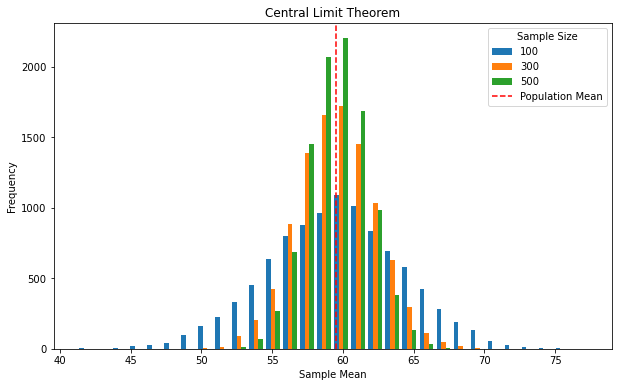

In [59]:
# Parameters for the population distribution
population_mean = df['rev_Mean'].mean() # Mean of the population
population_std = df['rev_Mean'].std()  # Standard deviation of the population

# Number of samples to generate
num_samples = 10000

# Sample sizes to consider
sample_sizes = [100, 300, 500]

# Generate random samples and calculate the sample means
sample_means = []
for size in sample_sizes:
    means = []
    for _ in range(num_samples):
        sample = np.random.normal(population_mean, population_std, size)
        means.append(np.mean(sample))
    sample_means.append(means)

# Plotting the sample means for different sample sizes
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=30, label=sample_sizes)
plt.axvline(x=population_mean, color='red', linestyle='--', label='Population Mean')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Central Limit Theorem')
plt.legend(title='Sample Size')
plt.show()

# ♦ Proving the Central Limit teorem (mou_Mean) ♦

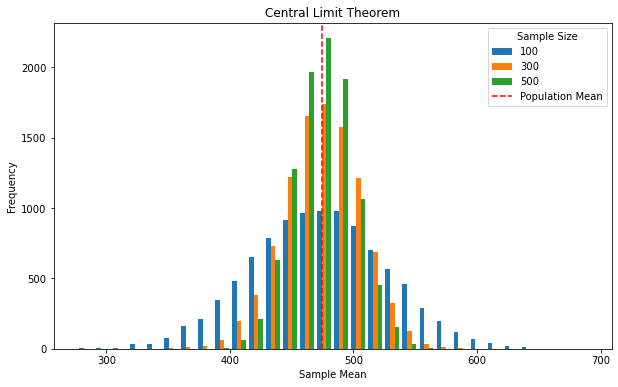

In [46]:
# Parameters for the population distribution
population_mean = df['mou_Mean'].mean() # Mean of the population
population_std = df['mou_Mean'].std()  # Standard deviation of the population

# Number of samples to generate
num_samples = 10000

# Sample sizes to consider
sample_sizes = [100, 300, 500]

# Generate random samples and calculate the sample means
sample_means = []
for size in sample_sizes:
    means = []
    for _ in range(num_samples):
        sample = np.random.normal(population_mean, population_std, size)
        means.append(np.mean(sample))
    sample_means.append(means)

# Plotting the sample means for different sample sizes
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=30, label=sample_sizes)
plt.axvline(x=population_mean, color='red', linestyle='--', label='Population Mean')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Central Limit Theorem')
plt.legend(title='Sample Size')
plt.show()

# ♦ Filtering rows ♦

In [96]:
#we remove rows where rev_Mean values are outlier and mou_Mean values are not outlier
upperoutlier_rev = df['rev_Mean'].mean() + 3 * df['rev_Mean'].std()
loweroutlier_rev = df['rev_Mean'].mean() - 3 * df['rev_Mean'].std()
upperoutlier_mou = df['mou_Mean'].mean() + 3 * df['mou_Mean'].std()
loweroutlier_mou = df['mou_Mean'].mean() - 3 * df['mou_Mean'].std()

filtered_df = df[(df['rev_Mean'] < loweroutlier_rev) & (df['rev_Mean'] > upperoutlier_rev) & (df['mou_Mean'] > loweroutlier_mou) & (df['mou_Mean'] < upperoutlier_mou)]
df.drop(filtered_df.index)

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0000,0.0000,0.0,0.0000,-157.25,...,0.0,N,U,U,U,U,U,Y,361,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1000,9.1000,0.0,0.0000,532.25,...,0.0,Z,U,U,U,U,U,Y,240,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0000,0.0000,0.0,0.0000,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0000,0.0000,0.0,0.0000,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0000,0.0000,0.0,0.0000,38.50,...,0.0,I,U,U,U,U,U,Y,434,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,30.0000,230.75,30.000,0.0000,0.00,0.0000,0.0000,0.0,0.0000,-4.75,...,0.0,O,U,U,U,U,U,N,163,1009996
9996,16.9900,0.25,16.990,0.0000,0.00,0.0000,0.0000,0.0,0.0000,0.75,...,0.0,S,U,U,U,U,U,Y,979,1009997
9997,227.1350,1662.00,189.990,1.4850,194.75,48.6875,48.6875,0.0,3.7225,346.00,...,1.0,N,U,U,U,U,U,Y,477,1009998
9998,76.7850,154.75,34.980,0.0000,12.75,3.8250,3.8250,0.0,0.0000,-146.75,...,0.0,G,U,U,U,U,Y,Y,76,1009999


# ♦ Making with various sample size ♦

Rev Mean
------------------
59.6


Text(0, 0.5, 'Probability Density')

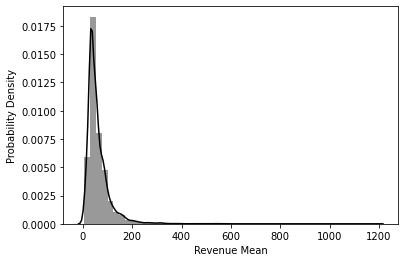

In [98]:
#we show central limit teorem with seaborn
rev_Mean = df['rev_Mean']
print("Rev Mean")
print("------------------")
print(round(rev_Mean.mean(),1))
sns.distplot(rev_Mean, color='black')
plt.xlabel('Revenue Mean')
plt.ylabel('Probability Density')

In [99]:
#we create func and we test central limit test
mean = []
def cal_sample_mean(sample_size, no_of_sample_means):
    for i in range(no_of_sample_means):        
        sample_base_salary = rev_Mean.sample(n=sample_size)
        sample_mean=sample_base_salary.mean()
        mean.append(sample_mean)
    return mean

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Probability Density')

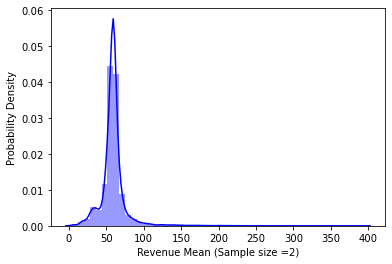

In [95]:
mean_2=cal_sample_mean(sample_size=2, no_of_sample_means=500)
sns.distplot(mean_2, color='b')
plt.xlabel('Revenue Mean (Sample size =2)')
plt.ylabel('Probability Density')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Probability Density')

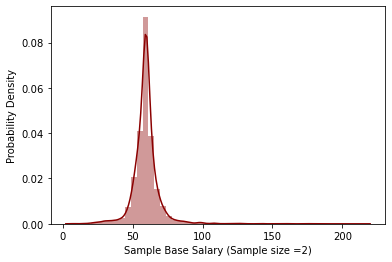

In [83]:
mean_2=cal_sample_mean(sample_size=50, no_of_sample_means=500)
sns.distplot(mean_2, color='darkred')
plt.xlabel('Revenue Mean (Sample size =50)
plt.ylabel('Probability Density')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Probability Density')

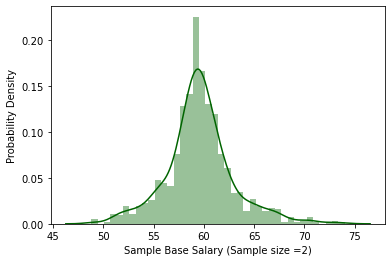

In [101]:
mean_2=cal_sample_mean(sample_size=1000, no_of_sample_means=500)
sns.distplot(mean_2, color='darkgreen')
plt.xlabel('Revenue Mean (Sample size =100)')
plt.ylabel('Probability Density')

# 🔎 The End 